In [1]:
import numpy as np

def act(x, deriv=False):
    if deriv:
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([[0,0,1],[0,1,0],[1,0,1],[1,1,1]])
Y = np.array([[0,0,1,1]])

syn0 = 2*np.random.random((3,1)) - 1

for iter in range(10000):    
    l0 = X
    l1 = act(np.dot(l0,syn0))
    l1_error = Y.T - l1
    l1_delta = l1_error*act(l1,True)
    syn0 += np.dot(l0.T,l1_delta)
    #print(np.dot(l0.T,l1_delta))
    
print(l1)   

[[0.01454033]
 [0.01453864]
 [0.99981213]
 [0.98742357]]


In [2]:
import numpy as np

def act(x, deriv=False):
    if deriv:
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([[0,0,1],[0,1,0],[1,0,1],[1,1,1]])
Y = np.array([[0,0,1,1]])

syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

for iter in range(10000):    
    l0 = X
    l1 = act(np.dot(l0,syn0))
    l2 = act(np.dot(l1,syn1))      
    
    l2_error = Y.T - l2
    l2_delta = l2_error*act(l2,True)
    syn1 += np.dot(l1.T,l2_delta)
    
    l1_error = np.dot(l2_delta,syn1.T)
    l1_delta = l1_error*act(l1,True)
    syn0 += np.dot(l0.T,l1_delta)
    
print(l2)

[[0.0053105 ]
 [0.00462821]
 [0.99532968]
 [0.99234978]]


In [3]:
import numpy as np

def act(x, deriv=False):
    if deriv:
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([[0,0,1],[0,1,0],[1,0,1],[1,1,1]])
Y = np.array([[0,0,1,1]])

syn0 = 2*np.random.random((4,4)) - 1
syn1 = 2*np.random.random((5,1)) - 1

for iter in range(10000):    
    X_ext = np.concatenate((X, np.ones([X.shape[0], 1])), axis=1)
    l0_ext = X_ext
    l1 = act(np.dot(l0_ext,syn0))
    l1_ext = np.concatenate((l1, np.ones([l1.shape[0], 1])), axis=1)
    l2 = act(np.dot(l1_ext,syn1))      
    
    l2_error = Y.T - l2
    l2_delta = l2_error*act(l2,True)
    syn1 += np.dot(l1_ext.T,l2_delta)
    
    l1_error = np.dot(l2_delta,syn1.T)
    l1_delta = l1_error*act(l1_ext,True)
    syn0 += np.dot(l0_ext.T,l1_delta[:, :-1])
    
print(l2)

[[0.00539184]
 [0.0037123 ]
 [0.99560326]
 [0.99547443]]


(1797, 64)


<Figure size 432x288 with 0 Axes>

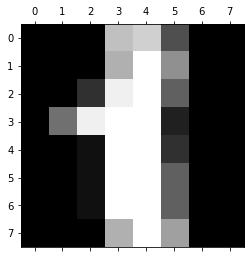

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1])
plt.show()

In [5]:
digits.data[0, : ]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()
X = X_scale.fit_transform(digits.data)
X[0,:]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

In [7]:
from sklearn.model_selection import train_test_split
y = digits.target
print(len(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
y_test

1797


array([2, 2, 7, 0, 6, 2, 7, 4, 5, 4, 2, 4, 4, 7, 0, 0, 0, 5, 5, 8, 6, 2,
       5, 0, 6, 0, 0, 9, 1, 1, 0, 6, 5, 4, 2, 6, 7, 4, 3, 9, 9, 9, 7, 6,
       5, 0, 1, 4, 4, 7, 8, 3, 3, 5, 6, 5, 1, 2, 1, 4, 0, 8, 5, 9, 5, 7,
       2, 3, 4, 9, 2, 3, 6, 4, 5, 9, 0, 9, 4, 9, 0, 3, 6, 8, 1, 5, 5, 7,
       4, 4, 0, 1, 4, 0, 2, 0, 6, 6, 2, 0, 6, 8, 7, 5, 3, 2, 8, 2, 2, 6,
       8, 8, 1, 7, 9, 4, 1, 2, 0, 1, 6, 6, 8, 1, 2, 2, 8, 8, 3, 7, 5, 4,
       6, 8, 7, 4, 5, 2, 9, 0, 8, 0, 1, 4, 2, 0, 0, 0, 9, 2, 5, 8, 0, 5,
       2, 9, 4, 4, 4, 9, 3, 2, 2, 1, 7, 3, 5, 7, 0, 4, 9, 9, 3, 7, 9, 4,
       2, 6, 4, 6, 1, 2, 9, 3, 0, 7, 8, 2, 5, 9, 4, 9, 1, 1, 2, 9, 7, 5,
       8, 7, 7, 0, 2, 5, 3, 2, 8, 5, 8, 8, 3, 3, 1, 0, 1, 4, 4, 7, 2, 3,
       2, 2, 6, 9, 0, 6, 9, 3, 8, 4, 7, 5, 8, 9, 9, 2, 4, 6, 7, 0, 9, 5,
       3, 5, 5, 1, 9, 0, 3, 2, 8, 8, 1, 4, 7, 8, 9, 7, 4, 5, 4, 1, 0, 2,
       6, 7, 6, 7, 4, 9, 9, 0, 9, 4, 3, 6, 8, 8, 7, 3, 8, 1, 3, 5, 4, 6,
       3, 1, 9, 3, 8, 4, 3, 9, 9, 7, 4, 6, 5, 9, 9,

In [8]:
# Нам нужно конвертировать это единственное число в вектор, 
#чтобы его можно было сравнивать с исходным слоем с 10 узлами. 
#Иными словами, если результат в MNIST обозначается как "1", 
#то нам нужно его конвертировать в вектор: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0].

import numpy as np
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)
y_train[0], y_v_train[0]

(6, array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]))

In [9]:
import numpy as np

def act(x, deriv=False):
    if deriv:
        return x*(1-x)
    return 1/(1+np.exp(-x))

X1 = X_train
Y1 = y_v_train
print(Y1)


syn0 = 2*np.random.random((64+1,30)) - 1
syn1 = 2*np.random.random((30+1,10)) - 1

for iter in range(3000):    
    X_ext = np.concatenate((X1, np.ones([X1.shape[0], 1])), axis=1)
    l0_ext = X_ext
    l1 = act(np.dot(l0_ext,syn0))
    l1_ext = np.concatenate((l1, np.ones([l1.shape[0], 1])), axis=1)
    l2 = act(np.dot(l1_ext,syn1))      
    
    l2_error = Y1 - l2
    l2_delta = l2_error*act(l2,True)
    syn1 += 1.0/len(X1) * np.dot(l1_ext.T,l2_delta)
    
    l1_error = np.dot(l2_delta,syn1.T)
    l1_delta = l1_error*act(l1_ext,True)
    syn0 += 1.0/len(X1) * np.dot(l0_ext.T,l1_delta[:, :-1])
    
print(l2)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[[7.32171868e-03 2.01022545e-01 2.82539926e-02 ... 6.14715237e-04
  1.66423666e-01 5.42762250e-07]
 [8.53802277e-01 2.23026437e-06 8.14954577e-03 ... 1.74675335e-02
  1.93404188e-03 3.21588319e-02]
 [3.65313175e-02 6.40055992e-04 8.62335067e-04 ... 1.04562681e-01
  4.09489346e-04 6.75781579e-02]
 ...
 [9.78943210e-01 3.13189781e-06 2.70191938e-03 ... 2.25746118e-03
  8.42358437e-03 1.11205665e-02]
 [9.83041005e-01 4.98940697e-06 4.77791386e-03 ... 6.67125026e-03
  6.48170824e-03 3.54063935e-03]
 [2.54386656e-02 1.59575252e-02 8.62434182e-01 ... 5.22496103e-04
  5.41889208e-04 3.45163817e-04]]


[0 2]


<Figure size 432x288 with 0 Axes>

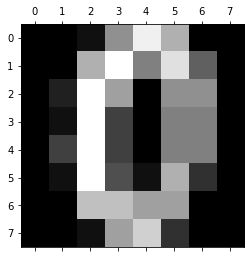

<Figure size 432x288 with 0 Axes>

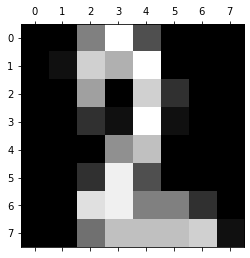

In [10]:
def predict(X):
    X_ext = np.concatenate((X, np.ones([X.shape[0], 1])), axis=1)
    l0_ext = X_ext
    l1 = act(np.dot(l0_ext,syn0))
    l1_ext = np.concatenate((l1, np.ones([l1.shape[0], 1])), axis=1)
    l2 = act(np.dot(l1_ext,syn1))
    return np.argmax(l2, axis=1)

print(predict(np.array([X[10],X[22]])))

plt.gray()
plt.matshow(digits.images[10])
plt.show()

plt.gray()
plt.matshow(digits.images[22])
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
y_pred = predict(X_test)
accuracy_score(y_test, y_pred)*100

95.6884561891516

In [3]:
import numpy as np
import pygame

img_orig = np.zeros((80,80))
dataset = np.empty((0,2), dtype='f')

def createData(position):
    (x,y) = position
    coord = [x,y]
    global dataset
    dataset = np.append(dataset, [coord], axis=0)


R = 30
color = (0,0,0)
radius = 5
bg_color = (255,255,255)
(width,height) = (80,80)

screen = pygame.display.set_mode((width,height))
pygame.display.set_caption("Digit generator")
surface = pygame.Surface(screen.get_size())

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
            
    if pushing:
        createData(pygame.mouse.get_pos())
            
    screen.fill(bg_color)
    
    for data in dataset:
        pygame.draw.circle(screen,color,(int(data[0]),int(data[1])),radius,0)
    
    pygame.display.flip()
    pxarray = pygame.PixelArray(surface)

pygame.quit()

In [8]:
print(pxarray[100,100])

0
